In [61]:
import numpy as np
import pandas as pd
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')

In [68]:
df = pd.read_csv('seturl.csv', encoding = 'utf-8') 
df = pd.DataFrame(df)
df.head()


,url,label
0,https://www.drive.google.com,0
1,www.gmail.google.com,0
2,http://facebook.com,0
3,https://yahoo.com,0
4,001web.net,1


<AxesSubplot:>

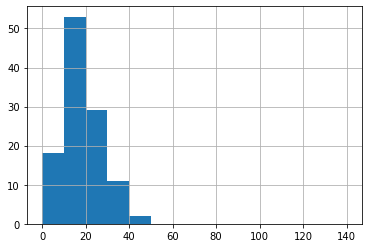

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline
lens = df.url.str.len()
lens.hist(bins = np.arange(0,150,10))


In [113]:
def tokenize(input):
    tokenspos = str(input.encode('utf-8')).split('/')
    alltokens=[]
    for i in tokenspos:
        tokens = str(i).split('-')
        tokenspot = []
        for j in range(0,len(tokens)):
            temptokens = str(tokens[j]).split('.')
            tokentpot = tokenspot + temptokens
        alltokens = alltokens + tokens + tokenspot
    alltokens = list(set(alltokens))
    if 'com' in alltokens:
        alltokens.remove('com')
    return alltokens

In [115]:
y = [d[1]for d in df] #kategorije
myurls = [d[0]for d in df] #urlovi
vectorizer = TfidfVectorizer( tokenizer=tokenize ,use_idf=True, smooth_idf=True, sublinear_tf=False)
features = vectorizer.fit_transform(df.url).toarray()
labels = df.label
features.shape

(113, 166)

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
model = LogisticRegression(random_state=0)
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.20, random_state=42)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)
clf = LogisticRegression(random_state=0) 
clf.fit(X_train,y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print ('točnost učenje =', train_score)
print ('točnost test =', test_score)

točnost učenje = 1.0
točnost test = 0.6521739130434783


Text(0.5, 15.0, 'Predviđeni')

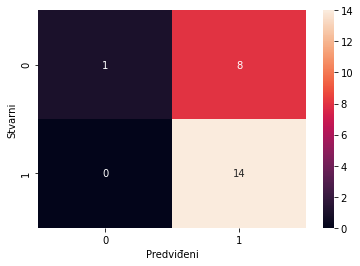

In [117]:
#matriks
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
 xticklabels=category_id_df.label.values, yticklabels=category_id_df.label.values)
plt.ylabel('Stvarni')
plt.xlabel('Predviđeni')

In [118]:
#primjena predviđanja na inputu unošenjem urlova u listu stringova:
X_predict = ['http://123movies.co','www.radsport-voggel.de/wp-admin/includes/log.exe', 'https://www.google.net']
X_predict = vectorizer.transform(X_predict)
y_Predict = clf.predict(X_predict)
print(y_Predict)

[0 1 0]
